## Predicting income using [Deep Neural Networks](https://docs.fast.ai/tabular.html) from Fastai.
### You can download this dataset from [Kaggle](https://www.kaggle.com/uciml/adult-census-income)
**The prediction task is to determine whether a person makes over $50K a year.**

In [1]:
from fastai.tabular import *
import path

In [2]:
data_path = Path('data')
data_path.ls()

[PosixPath('data/adult.csv')]

In [3]:
df_raw = pd.read_csv(data_path/"adult.csv")

In [5]:
print(df_raw.shape)
df_raw.dtypes

(32561, 15)


age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
df_raw.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


* We use [Fastai](https://docs.fast.ai/tabular.data.html) to preprocess the Tabular data we then use a [Deep neural network.](https://docs.fast.ai/tabular.models.html).

In [7]:
dep_var = 'income'
cat_var = ['workclass','education','marital.status','occupation','relationship','race','sex','native.country']
cont_var = ['education.num', 'hours.per.week', 'age', 'capital.loss', 'fnlwgt', 'capital.gain']
proc = [FillMissing,Categorify,Normalize]
valid_idx = range((len(df_raw) - 6000),len(df_raw))

In [8]:
data = (TabularList.from_df(df_raw,cat_names=cat_var,cont_names=cont_var,procs=proc)
                    .split_by_idx(valid_idx)
                    .label_from_df(cols=dep_var)
                    .databunch())

In [9]:
data.show_batch()

workclass,education,marital.status,occupation,relationship,race,sex,native.country,education.num,hours.per.week,age,capital.loss,fnlwgt,capital.gain,target
Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,-0.0440,-0.0417,0.8206,-0.2412,-0.1618,-0.1620,>50K
Private,Bachelors,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,1.1230,-2.0752,2.2095,-0.2412,-0.5625,0.1256,<=50K
Private,Assoc-acdm,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,0.7340,-0.0417,0.0165,-0.2412,-1.4621,-0.1620,<=50K
Private,10th,Never-married,Other-service,Own-child,White,Female,United-States,-1.6000,-1.2618,-1.5917,-0.2412,-1.4053,-0.1620,<=50K
Private,Bachelors,Never-married,Sales,Not-in-family,White,Female,United-States,1.1230,-0.0417,-0.6414,-0.2412,1.2711,-0.1620,<=50K


In [19]:
learner = tabular_learner(data,layers = [200,100],metrics=accuracy)

In [20]:
learner.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 5)
    (5): Embedding(6, 4)
    (6): Embedding(3, 3)
    (7): Embedding(43, 13)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=58, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [21]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


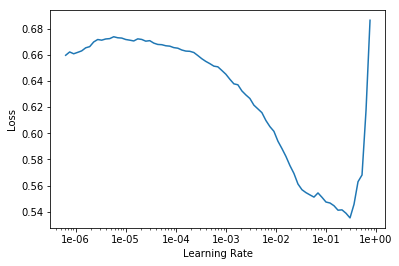

In [22]:
learner.recorder.plot()

In [23]:
learner.fit_one_cycle(2,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.340595,0.305596,0.859000,00:03
1,0.324259,0.302994,0.860833,00:03


In [24]:
learner.unfreeze()

In [25]:
learner.fit_one_cycle(4,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.335106,0.319816,0.851667,00:03
1,0.331572,0.313877,0.858500,00:03
2,0.323340,0.304303,0.861500,00:03
3,0.312644,0.304319,0.861500,00:03


In [27]:
print("Validation accuracy:{:.3f}".format(learner.validate()[1]))

Validation accuracy:0.862


In [28]:
learner.show_results()

workclass,education,marital.status,occupation,relationship,race,sex,native.country,education.num,hours.per.week,age,capital.loss,fnlwgt,capital.gain,target,prediction
Self-emp-not-inc,Some-college,Widowed,Craft-repair,Not-in-family,Black,Male,United-States,-0.0440,-0.4484,0.9668,-0.2412,-1.4211,-0.1620,<=50K,<=50K
Local-gov,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,United-States,1.5120,-0.4484,0.6013,-0.2412,0.2583,-0.1620,>50K,<=50K
Private,HS-grad,Married-civ-spouse,Protective-serv,Husband,Black,Male,India,-0.4330,-0.0417,1.6247,-0.2412,-0.6212,-0.1620,<=50K,<=50K
Local-gov,Masters,Divorced,Prof-specialty,Not-in-family,Black,Male,Dominican-Republic,1.5120,-0.0417,0.0165,-0.2412,0.4721,-0.1620,<=50K,<=50K
Private,Some-college,Divorced,Sales,Unmarried,White,Male,United-States,-0.0440,0.7717,0.6013,-0.2412,0.0053,-0.1620,<=50K,<=50K
